# TASK1

### Required imports of Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Suppress warnings
warnings.filterwarnings("ignore")

In [8]:
# Load datasets
students_marks_df = pd.read_csv("/kaggle/input/data-visulixation/students_marks.csv")
sessions_data_df = pd.read_csv("/kaggle/input/data-visulixation/all_sessions_data.csv")


## Data preprocessing

# Handling Mixed Format Timestamps and Converting to Dubai Time  

## Convert Timestamp Column to Datetime  
The `TimeStamp` column is converted to a proper datetime format while handling mixed formats. Any invalid timestamps are coerced to `NaT` instead of raising errors.  

## Drop Invalid Timestamps  
Rows containing `NaT` values in the `TimeStamp` column are dropped to maintain data integrity.  

## Convert to Dubai Time (UTC +4)  
The valid timestamps are first localized to UTC before being converted to Dubai time (UTC+4). This ensures all timestamps are consistently formatted and correctly aligned with the Dubai time zone.  


In [9]:
# Convert timestamp column to datetime with mixed format handling
sessions_data_df["TimeStamp"] = pd.to_datetime(sessions_data_df["TimeStamp"], errors='coerce', format='mixed')

# Convert to Dubai Time (UTC +4)
sessions_data_df = sessions_data_df.dropna(subset=["TimeStamp"])  # Drop invalid timestamps
sessions_data_df["TimeStamp"] = sessions_data_df["TimeStamp"].dt.tz_localize("UTC").dt.tz_convert("Asia/Dubai")

# Extracting Date and Hour from Timestamp  

## Extract Date  
The `Date` column is created by extracting only the date portion from the `TimeStamp` column. This helps in analyzing data on a daily basis without considering the time.  

## Extract Hour  
The `Hour` column is generated by extracting the hour component from the `TimeStamp` column. This allows for time-based analysis, such as identifying peak activity hours.  


In [10]:
# Extract date and hour
sessions_data_df["Date"] = sessions_data_df["TimeStamp"].dt.date
sessions_data_df["Hour"] = sessions_data_df["TimeStamp"].dt.hour


## Visualizations

# Distribution of Online Test and Written Assignment Scores  

## Overview  
This visualization represents the distribution of students' scores in the Online Test and Written Assignment.  

## Histogram with KDE  
A histogram is plotted using `sns.histplot()`, where both `OnlineTest` and `WrittenAssignment` scores are displayed. The `kde=True` parameter overlays a Kernel Density Estimate (KDE) curve to show the probability distribution of scores.  

## Visualization Details  
- The `bins=20` parameter ensures the scores are grouped into 20 intervals for better granularity.  
- The `palette='coolwarm'` enhances visual clarity by assigning distinct colors.  
- The plot size is set to `(12,6)` for better readability.  

This distribution helps in understanding the spread and concentration of scores, identifying patterns such as clustering or skewness.  


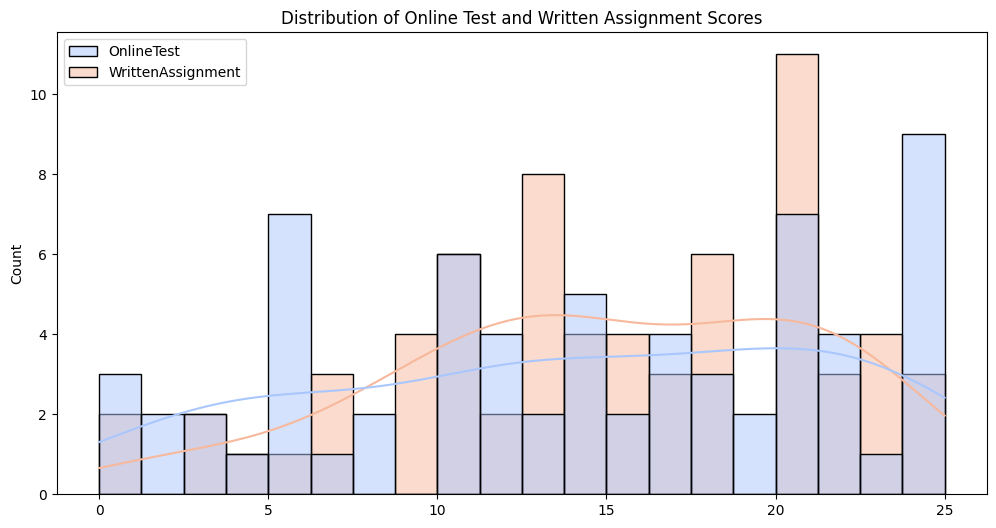

In [11]:
### 1. Distribution of Online Test and Written Assignment Scores
plt.figure(figsize=(12,6))
sns.histplot(students_marks_df[['OnlineTest', 'WrittenAssignment']], kde=True, bins=20, palette='coolwarm')
plt.title("Distribution of Online Test and Written Assignment Scores")
plt.show()


# Correlation Heatmap of Student Performance Metrics  

## Overview  
This heatmap visualizes the correlation between different student performance metrics, helping to identify relationships between variables.  

## Correlation Matrix  
- The `PseudoName` column is dropped as it is not relevant for numerical correlation analysis.  
- The `.corr()` function calculates the correlation coefficients between numerical columns.  

## Heatmap Visualization  
- `sns.heatmap()` is used to create the heatmap, where:  
  - `annot=True` displays the correlation values inside the heatmap.  
  - `cmap="coolwarm"` applies a color gradient to distinguish positive and negative correlations.  
  - `fmt=".2f"` ensures values are displayed with two decimal places.  
- The figure size `(8,6)` is set for clear visualization.  

This heatmap helps in identifying strong or weak correlations, which can be useful for further analysis or predictive modeling.  


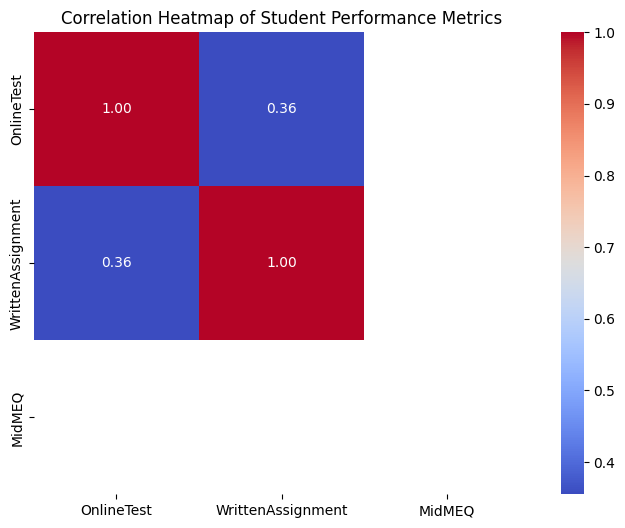

In [12]:
### 2. Correlation Heatmap
plt.figure(figsize=(8,6))
correlation_matrix = students_marks_df.drop(columns=["PseudoName"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Metrics")
plt.show()

# Daily Student Activity in Jupyter Notebook  

## Overview  
This line plot visualizes student activity over time by tracking the number of sessions per day.  

## Data Aggregation  
- The dataset is grouped by the `Date` column, and the count of sessions for each date is computed.  
- This provides insights into daily engagement trends.  

## Line Plot Visualization  
- A line plot is created using `.plot()` to show activity patterns over time.  
- `marker="o"` highlights individual data points for better readability.  
- `linestyle="-"` connects the points to illustrate trends.  
- The x-axis labels are rotated (`xticks(rotation=45)`) for better visibility.  
- A grid is added (`grid=True`) to enhance readability.  

This visualization helps in understanding engagement patterns, identifying peak activity days, and detecting trends over time.  


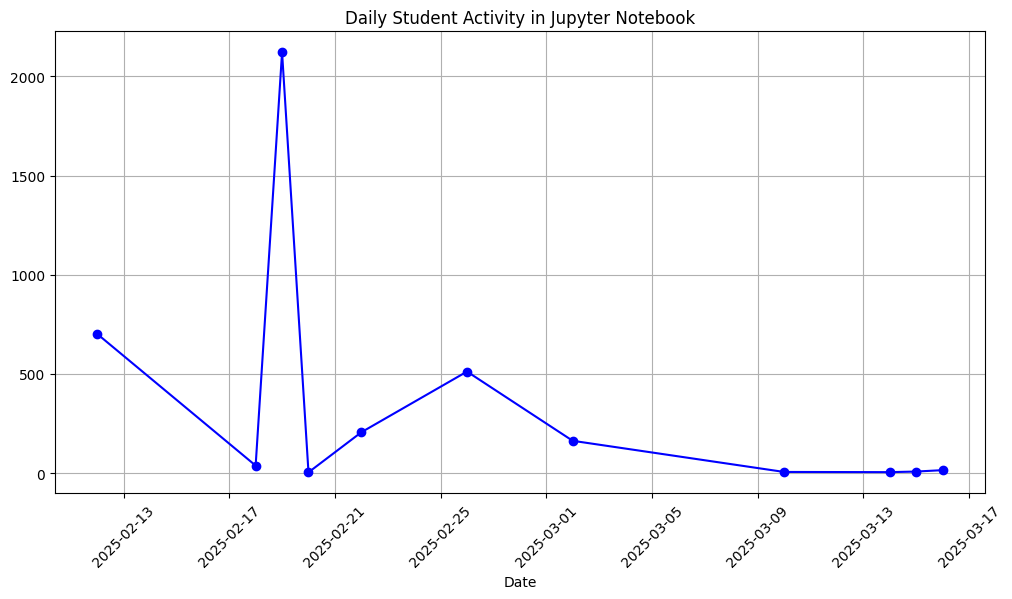

In [13]:
### 3. Student Activity Over Time
daily_activity = sessions_data_df.groupby("Date").size()
plt.figure(figsize=(12,6))
daily_activity.plot(marker="o", linestyle="-", color="b")
plt.title("Daily Student Activity in Jupyter Notebook")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Student Activity by Hour of the Day  

## Overview  
This bar chart visualizes student activity patterns throughout the day by analyzing the number of sessions per hour.  

## Data Aggregation  
- The dataset is grouped by the `Hour` column to count the number of sessions for each hour of the day.  
- This helps in identifying peak activity hours when students are most engaged.  

## Bar Chart Visualization  
- `sns.barplot()` is used to create the bar chart.  
- The `x` values represent the hours of the day (0–23), and the `y` values represent the number of sessions.  
- The `palette="viridis"` enhances visual appeal by applying a color gradient.  
- `xticks(range(0,24))` ensures all hours are displayed on the x-axis.  
- A grid is added along the y-axis (`grid(axis="y")`) to improve readability.  

This visualization helps in understanding students' study habits and optimizing learning schedules based on activity trends.  


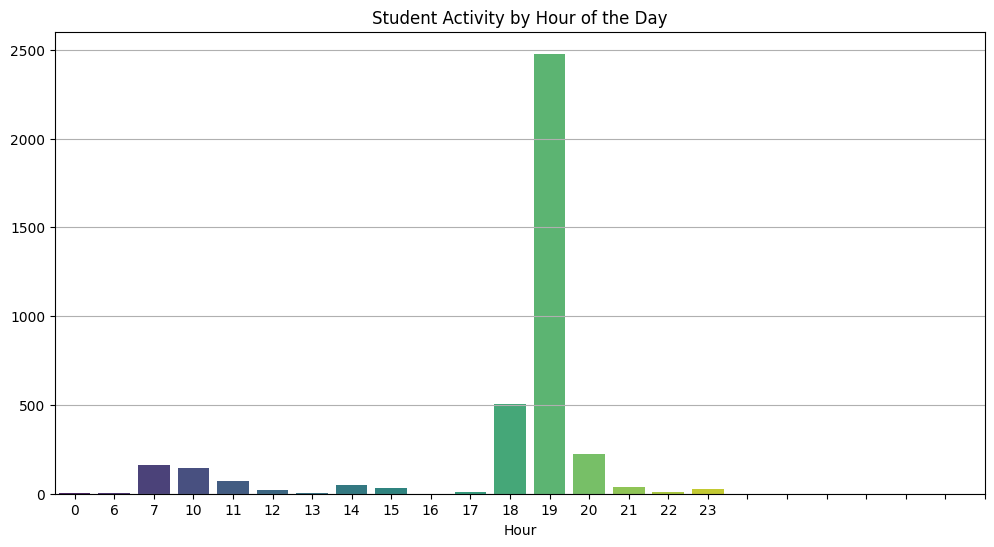

In [14]:
### 4. Student Activity by Hour of the Day
hourly_activity = sessions_data_df.groupby("Hour").size()
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette="viridis")
plt.title("Student Activity by Hour of the Day")
plt.xticks(range(0,24))
plt.grid(axis="y")
plt.show()


# Logins vs. Online Test Scores  

## Overview  
This scatter plot visualizes the relationship between the number of logins and students' online test scores, helping to identify patterns in engagement and performance.  

## Data Processing  
- The dataset is filtered to count logins where `CheckPoint` is `"0"`, representing student logins.  
- The total login count for each student is calculated and merged with their online test scores.  
- Missing values in login counts are filled with `0` to account for students who never logged in.  

## Scatter Plot Visualization  
- `sns.scatterplot()` is used to create the plot, where:  
  - `x="LoginCount"` represents the number of logins.  
  - `y="OnlineTest"` represents the online test scores.  
  - `hue="OnlineTest"` applies a color gradient to differentiate test scores.  
  - `size="OnlineTest"` adjusts the marker size based on test scores.  
- The `palette="coolwarm"` enhances visual clarity with a color gradient.  
- The `sizes=(20,200)` ensures proper scaling of marker sizes.  
- A grid is added for better readability.  

This visualization helps in understanding whether frequent logins correlate with better test performance, revealing insights into student engagement.  


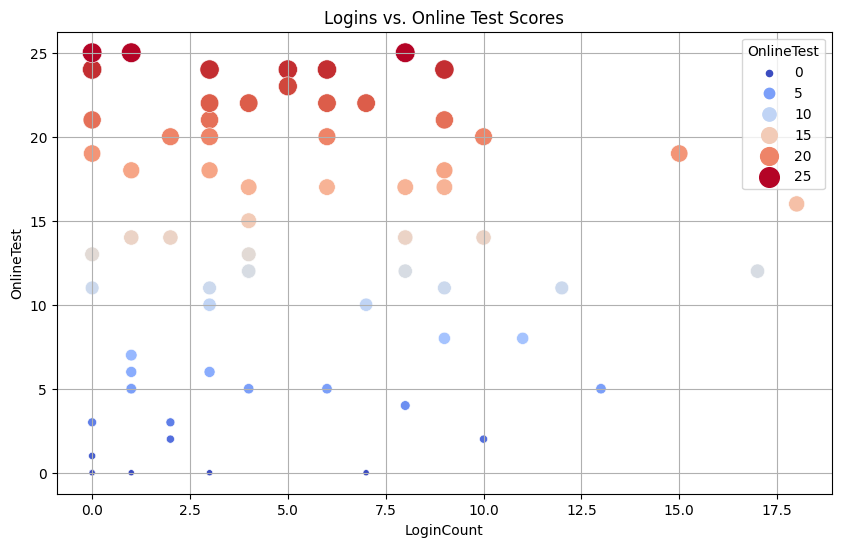

In [15]:
### 5. Logins vs. Online Test Scores
login_counts = sessions_data_df[sessions_data_df["CheckPoint"] == "0"].groupby("PseudoName").size().reset_index(name="LoginCount")
student_login_performance = students_marks_df.merge(login_counts, on="PseudoName", how="left").fillna(0)
plt.figure(figsize=(10,6))
sns.scatterplot(data=student_login_performance, x="LoginCount", y="OnlineTest", hue="OnlineTest", palette="coolwarm", size="OnlineTest", sizes=(20,200))
plt.title("Logins vs. Online Test Scores")
plt.grid(True)
plt.show()


# Violin Plot of Online Test and Written Assignment Scores  

## Overview  
This violin plot visualizes the distribution of students' scores in the Online Test and Written Assignment, showing both density and spread.  

## Data Transformation  
- The dataset is reshaped using `.melt()`, converting `OnlineTest` and `WrittenAssignment` columns into a long format.  
- This allows for easier comparison of the two score distributions in a single plot.  

## Violin Plot Visualization  
- `sns.violinplot()` is used to create the plot, where:  
  - `x="variable"` represents the test type (Online Test or Written Assignment).  
  - `y="value"` represents the corresponding scores.  
  - `palette="muted"` applies a subtle color scheme for clarity.  
- The violin plot displays both the distribution density and score spread, highlighting variations such as skewness or multimodal distributions.  

This visualization helps in comparing the score distributions, identifying differences in score variability, and detecting potential outliers.  


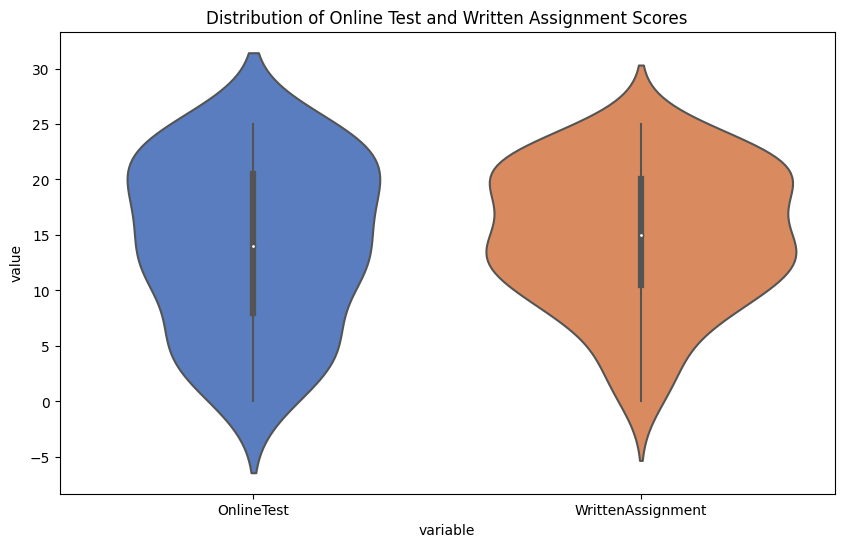

In [16]:
### 6. Violin Plot of Online Test and Written Assignment Scores
plt.figure(figsize=(10,6))
sns.violinplot(data=students_marks_df.melt(id_vars=["PseudoName"], value_vars=["OnlineTest", "WrittenAssignment"]), x="variable", y="value", palette="muted")
plt.title("Distribution of Online Test and Written Assignment Scores")
plt.show()

# Activity Trend of an Individual Student  

## Overview  
This line plot visualizes the activity trend of the most active student, showing how their engagement changes over time.  

## Identifying the Top Student  
- The student with the highest number of sessions is identified using `.value_counts().idxmax()`.  
- The dataset is filtered to include only this student's activity records.  

## Line Plot Visualization  
- `sns.lineplot()` is used to plot activity trends over time, where:  
  - `x="TimeStamp"` represents the session timestamps.  
  - `y=range(len(student_activity))` assigns an increasing count to each session, effectively tracking activity over time.  
  - `marker="o"` highlights individual activity points.  
  - `color="g"` sets the line color to green.  
- The x-axis labels are rotated (`xticks(rotation=45)`) for better readability.  
- A grid is added (`grid=True`) to improve visualization clarity.  

This plot helps in understanding the engagement pattern of the most active student, identifying study habits and peak activity periods.  


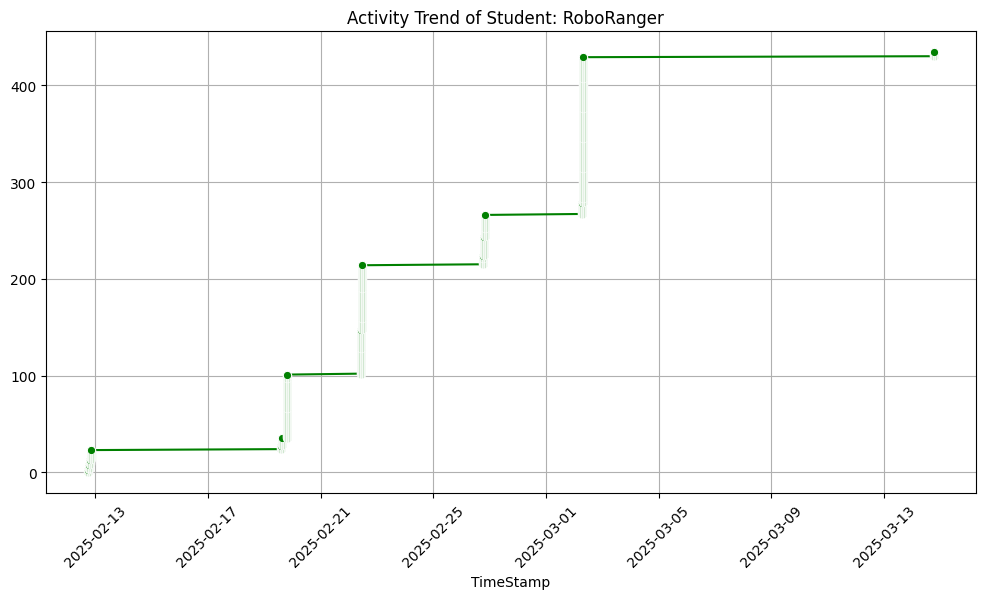

In [17]:
### 7. Activity Trend of an Individual Student
top_student = sessions_data_df["PseudoName"].value_counts().idxmax()
student_activity = sessions_data_df[sessions_data_df["PseudoName"] == top_student]
plt.figure(figsize=(12,6))
sns.lineplot(data=student_activity, x="TimeStamp", y=range(len(student_activity)), marker="o", color="g")
plt.title(f"Activity Trend of Student: {top_student}")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Boxplot of Online Test Scores vs. Mid-Module Evaluation  

## Overview  
This boxplot visualizes the distribution of online test scores based on students' participation in the Mid-Module Evaluation Questionnaire (MidMEQ).  

## Boxplot Visualization  
- `sns.boxplot()` is used to compare the spread and central tendency of Online Test scores for different MidMEQ categories.  
- `x="MidMEQ"` represents different groups based on survey participation.  
- `y="OnlineTest"` represents the online test scores.  
- The `palette="Set2"` provides a visually distinct color scheme.  

## Interpretation  
- The boxplot displays the median, quartiles, and potential outliers of test scores within each group.  
- This helps in understanding whether survey participation correlates with variations in test performance.  

This visualization provides insights into whether students who engage with the Mid-Module Evaluation tend to perform differently in online tests.  


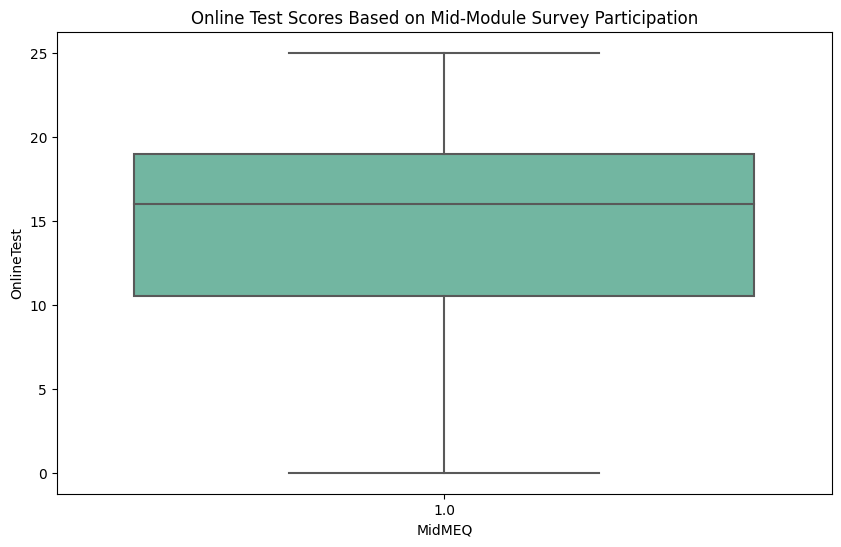

In [18]:
### 8. Boxplot of Scores vs. Mid-Module Evaluation
plt.figure(figsize=(10,6))
sns.boxplot(data=students_marks_df, x="MidMEQ", y="OnlineTest", palette="Set2")
plt.title("Online Test Scores Based on Mid-Module Survey Participation")
plt.show()

# Pairplot of Student Scores  

## Overview  
This pairplot visualizes the relationships between different student performance metrics, helping to identify correlations and patterns.  

## Pairplot Visualization  
- `sns.pairplot()` is used to generate scatter plots for each pair of numerical variables and KDE plots for individual distributions.  
- The `PseudoName` column is dropped as it is not relevant for numerical analysis.  
- `diag_kind="kde"` ensures kernel density estimation (KDE) plots are used on the diagonal, showing the distribution of each variable.  
- `palette="husl"` applies a distinct color scheme for better visual clarity.  

## Interpretation  
- The scatter plots help in identifying potential correlations between different scores.  
- The diagonal KDE plots reveal the distribution and density of each score type.  

This visualization is useful for exploring trends in student performance and detecting potential relationships between assessment types.  


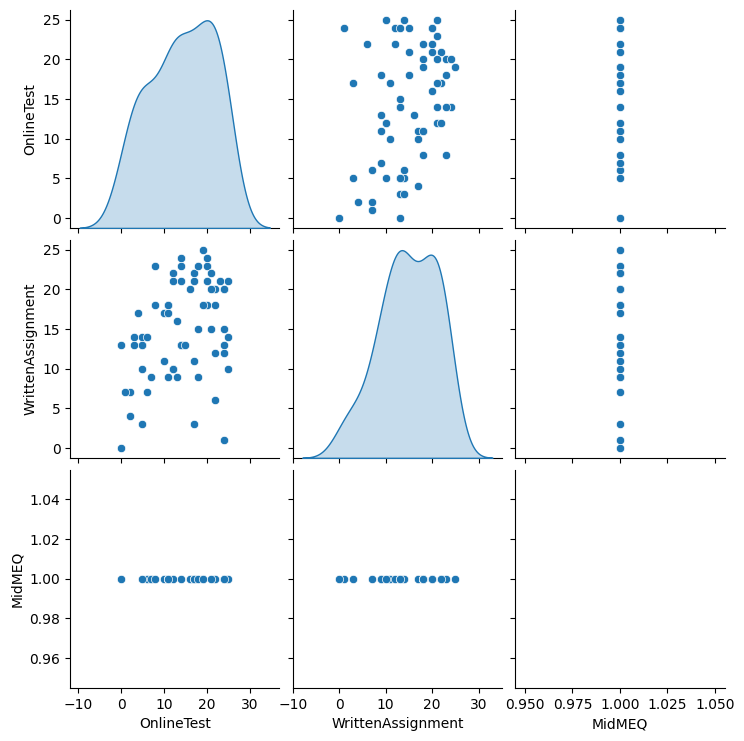

In [19]:
### 9. Pairplot of Student Scores
sns.pairplot(students_marks_df.drop(columns=["PseudoName"]), diag_kind="kde", palette="husl")
plt.show()

# Pairplot of Student Scores  

## Overview  
This pairplot visualizes the relationships between different student performance metrics, helping to identify correlations and patterns.  

## Pairplot Visualization  
- `sns.pairplot()` is used to generate scatter plots for each pair of numerical variables and KDE plots for individual distributions.  
- The `PseudoName` column is dropped as it is not relevant for numerical analysis.  
- `diag_kind="kde"` ensures kernel density estimation (KDE) plots are used on the diagonal, showing the distribution of each variable.  
- `palette="husl"` applies a distinct color scheme for better visual clarity.  

## Interpretation  
- The scatter plots help in identifying potential correlations between different scores.  
- The diagonal KDE plots reveal the distribution and density of each score type.  

This visualization is useful for exploring trends in student performance and detecting potential relationships between assessment types.  


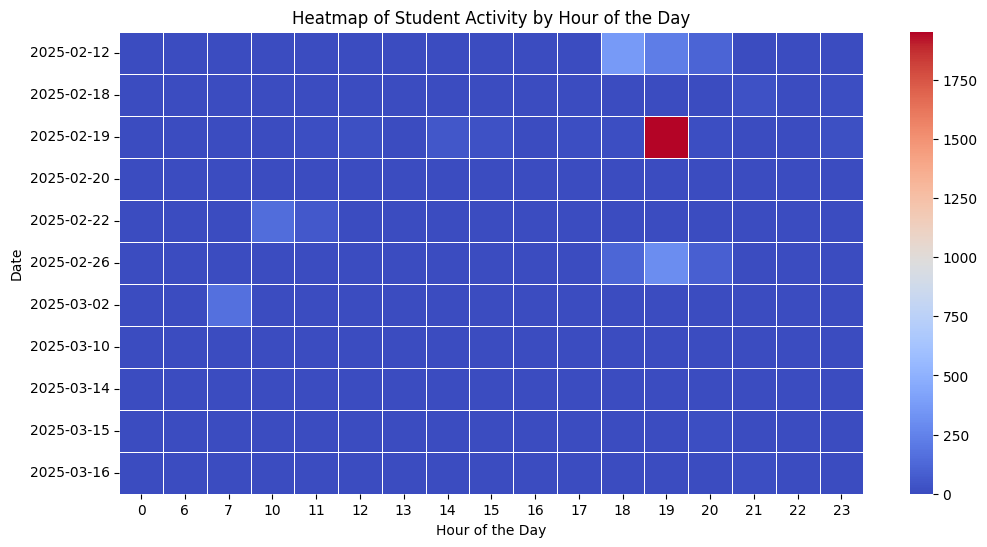

In [20]:
### 10. Heatmap of Activity Per Hour of the Day
activity_pivot = sessions_data_df.pivot_table(index="Date", columns="Hour", values="CheckPoint", aggfunc="count").fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(activity_pivot, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Student Activity by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Date")
plt.show()